# Table of Contents

- [Logistic Regression](#logistic)
- [Neural Network](#neuralnet)
- [Exercises](#exercises)

In [ ]:
from IPython.display import Image

# Housekeeping

- Some references for today
  - [Official pytorch tutorials](https://pytorch.org/tutorials)
  - [Pytorch tutorials by yunjey, from beginning to advanced](https://github.com/yunjey/pytorch-tutorial)
  - [MIT Intro to Deep Learning lecture video](https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=1)
    (overview of machine learning and neural networks)
  - [3blue1brown video on neural networks](https://www.youtube.com/watch?v=aircAruvnKk)
    (for understanding neural network basics)
  - [Deep Feedforward Networks from the Deep Learning Book](https://www.deeplearningbook.org/contents/mlp.html)
    (more advanced intro to NN)
- Today's url 
  - https://git.io/ml2021-03
- Email if you need help with any of this!

# Classification

- We've looked at linear regression, fitting a straight line to a dataset
- Today, we'll look at classification, in order to motivate building Neural Networks
  - In classification we have some data which could belong to one of several classes
  - We have some well-known data and we want to train a *classifier*
    which will tell us what class some new, unknown data comes from
  - E.g. classify images of pets into dogs and cats
  - Classify energy depositions in a calorimeter into photons and electrons
  - Based on several indicators (age, height, weight, etc.) say
    whether someone will get diabetes
- A basic technique is called *logistic regression*
  - Logistic "regression" is classification in disguise

- *Where we are heading:* we will build up logistic regression, which
  should be straightforward to understand, then see its limitations,
  which will lead us to the idea of neural networks

# Logistic Function <a id="logistic" />

- The logistic function is defined as $f(x) = \frac{1}{1+e^{-x}}$
  - Looks like a classic "turn-on" curve
- "Logistic regression" fits this function from several variables
- Concentrate on the case of two classes (cat/dog or electron/photon),
  and ask what we want from a classifier output
  - We need to distinguish between the two classes using the output:
  - If the value is 0, it represents the classifier identifying one class (cat)
  - If its near 1, the classifier is identifies the other class (dog)
  - Thus, we need to transform the input variables into 1D, then pass through the logistic function

Text(0.5, 0, 'x')

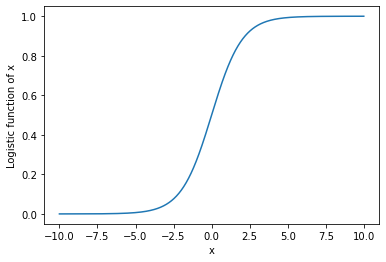

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10., 10., num=1000)
y = 1. / (1. + np.exp(-x))
plt.plot(x, y)
plt.ylabel('Logistic function of x')
plt.xlabel('x')

Text(0.5, 0, 'x')

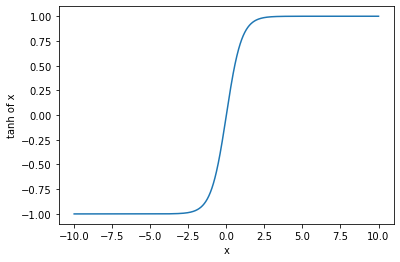

In [ ]:
# compare with tanh, which we will see later, similar characteristics, but range [-1,1]
x = np.linspace(-10., 10., num=1000)
y = np.tanh(x)
plt.plot(x, y)
plt.ylabel('tanh of x')
plt.xlabel('x')

## Logistic regression
- Setup: we have data from two different classes, which can be
  described by the same independent variables, and we want to
  distinguish them based on those independent variables
- We want to build a function such that data from one class goes close
  to 1, from the other close to 0
- We will build a linear function of the variables, then pass it
  through the logistic function, and try to minimise the distance of
  data from 0 (for one class), or 1 (for the other)
- $y_i = f(\vec\beta \cdot \vec{x_i}) + \epsilon_i$, $y_i = 0$ if $x_i$ from class 0 (red), $y_i = 1$ if $x_i$ from class 1 (blue)
  - $\vec\beta \cdot \vec{x_i} = \beta_0 + \beta_1 x_1 + \ldots \beta_k x_k$
  - $f(x) = \frac{1}{1+e^{-x}}$ the logistic function
- We will use SGD to find the values of $\beta$ which minimizes the log-likelihood (more on this later, you could also just minimize the sum of the residuals squared $\sum_i \epsilon_i^2$ as we did last week)

- Note: the logistic function is also called the sigmoid function,
  logistic curve, turn on curve, etc. depending on the context its
  used in

### Illustration: 1D Projection



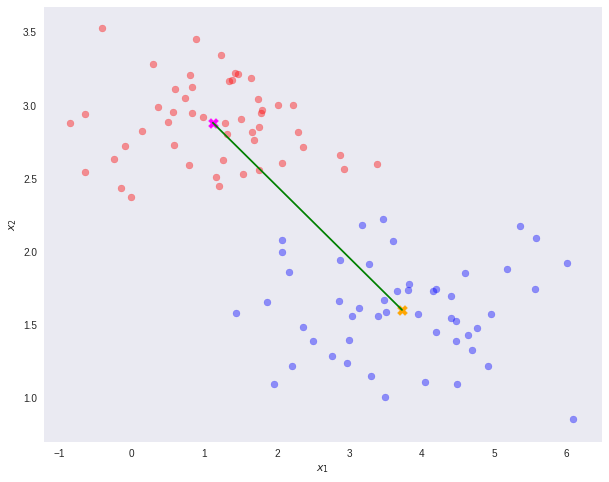

In [ ]:
Image('join_means.png') # join the centroids of red and blue

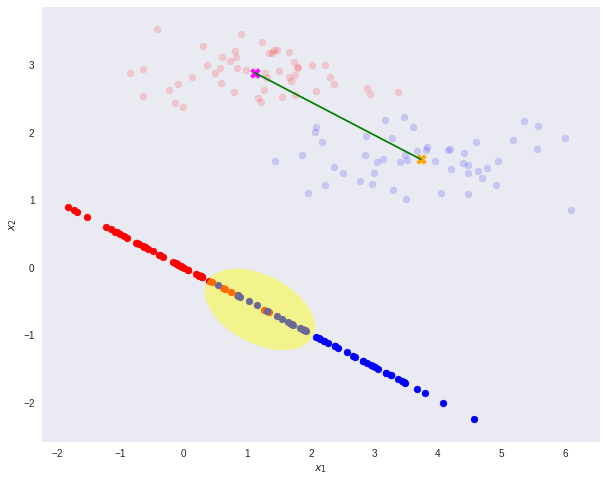

In [ ]:
Image('line_join_means.png') # and project the values onto the green line

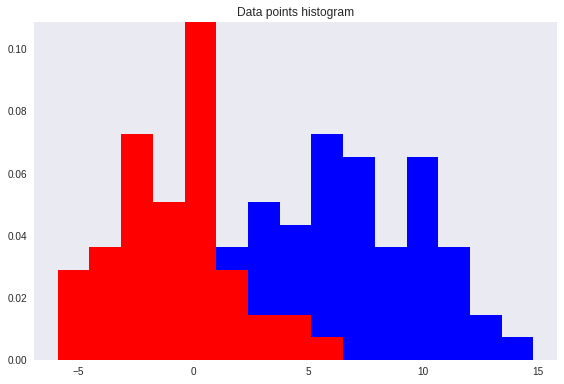

In [ ]:
Image('mean_distribution.png') # This is the distribution as a 1d histogram

- $\vec\beta \cdot \vec{x}$ is a projection of the data onto a line ($\vec\beta$ is the green line in the images above)
- Red and blue are two classes which can be measured in $(x_1, x_2)$
- We can take the mean of each class (left), form a line between, then
  project the data onto the line (middle) giving a distribution (right)
  - We have reduced the 2D data into a 1D projection
- After the projection, the logistic rejection chooses a cut point
  (via $\beta_0$, which adds a constant to the projection) then sends things below the cut to 0, above to 1
- Here, we see some separation between the classes but a lot of
  overlap. We can do better

### Illustration: Better Fit

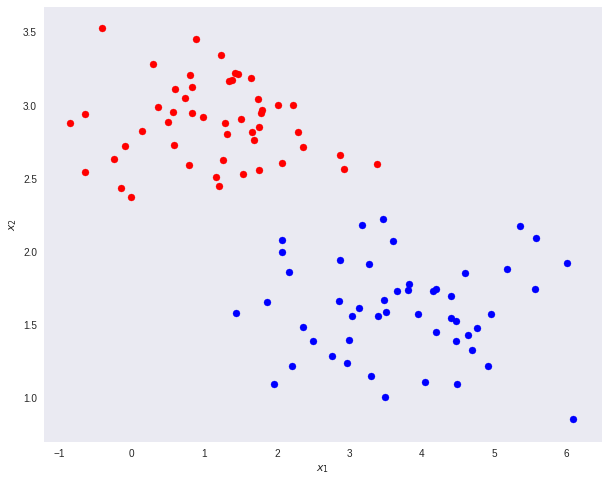

In [ ]:
Image('datapoints.png')

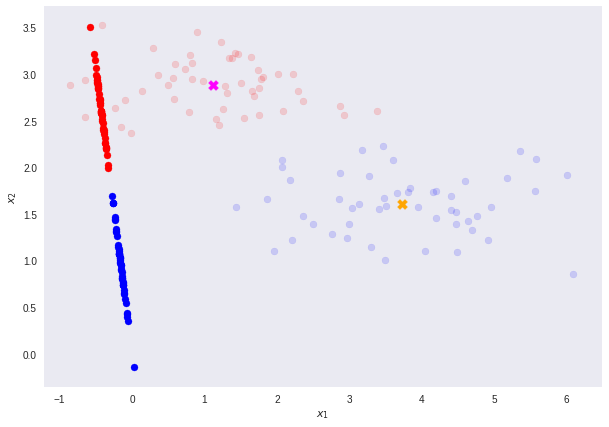

In [ ]:
Image('fisher_discriminant.png')

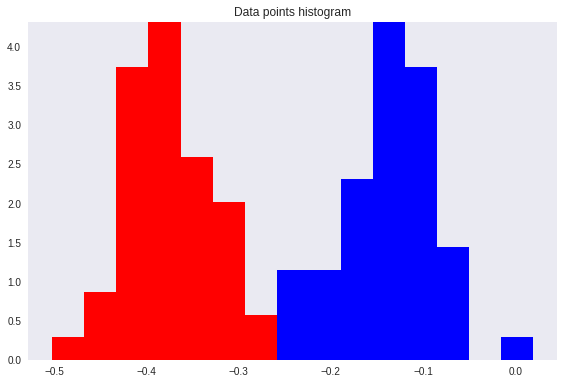

In [ ]:
Image('fisher_distro.png')

- Finding the best discriminant for our illustrative dataset shows
  that these two classes are fully separable
  - Find $\beta$ which minimizes a loss function of the same form as last week: $MSE = \frac{1}{m} \sum_i \left(f(x_i) - y_i\right)^2$ (or something similar like cross-entropy)
  - Using e.g. stochastic gradient descent
  - This is the usual goal in ML: setup a parameterized model and then
    define a function to minimize which gives the best parameters
- The Logistic Regression will place the cut point between the data
  and so all red go to 0, blue go to 1 after passing through the logistic function

[Reference: Illustrative introduction to Fisher's Linear Discriminant](https://medium.freecodecamp.org/an-illustrative-introduction-to-fishers-linear-discriminant-9484efee15ac)



# Some very simple examples for simple logistic regression

How far can we take logistic regression for classification?

Take a look at the following 2-class datasets:

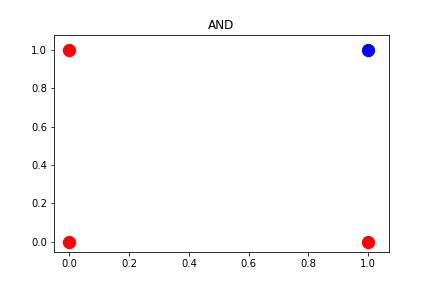

In [ ]:
Image('AND.png')

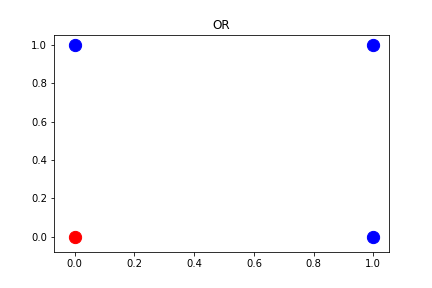

In [ ]:
Image('OR.png')

- Let's think about using logistic regression to approximate these
  simple binary functions
- They are: OR and AND gates
  - OR is 0 (red) if both input are 0, 1 (blue) otherwise
  - AND is 1 if both inputs are 1, 0 otherwise
- Can we find logistic function approximations for these?
  - That is, $f(x_1, x_2)$ returns approximately 1 or 0 at the indicated points

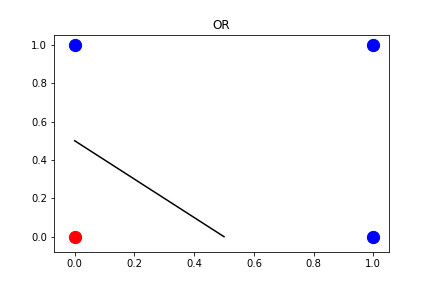

In [ ]:
Image('OR_cut.png')

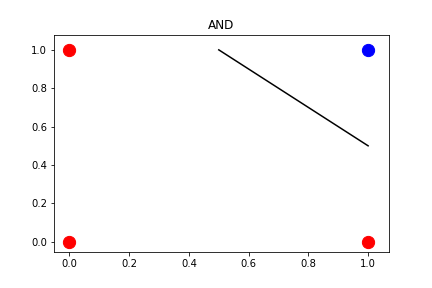

In [ ]:
Image('AND_cut.png')

- Yes! Take the projection perpendicular to the line

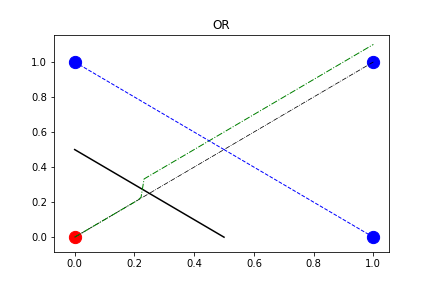

In [ ]:
Image('OR_turnon.png')

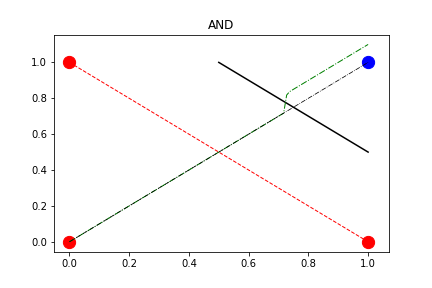

In [ ]:
Image('AND_turnon.png')

- and have the logistic turn on at the line (think of the green line as a plane rising in z at the black line)
  - e.g. $f(x_1, x_2) = \sigma(2 x_1 + 2 x_2 - 1)$ for OR, $f(x_1, x_2) = \sigma(2 x_1 + 2 x_2 - 3)$ for AND [$\sigma$ is our logistic function]

## Very simple example with issues for Logistic Regression

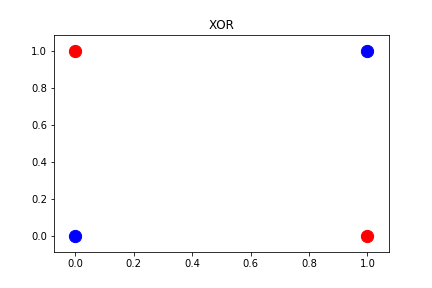

In [ ]:
Image('XOR.png')

- Now consider the XOR gate: 1 if both inputs are the same, 0 otherwise
- The XOR gate can't be generated with a logistic function!
- Try it: no matter what line you draw, can't draw a logistic function
  that turns on only the blue!
- Logistic regression is a useful tool for simple datasets, but in
  general we'll need a more powerful idea

### How to Fix: more logistic curves!

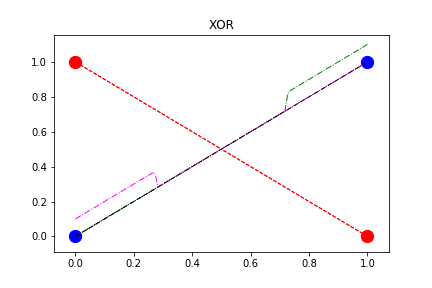

In [ ]:
Image('XOR_turnon.png')

- Can fix by having 2 turn-on curves, one turning on either of the
  blue points, then summing the result
- $f(x_1, x_2) = $ <font color="green">$\sigma(2 x_1 + 2 x_2 - 1)$</font> $+$ <font color="magenta">$\sigma(- 2 x_1 - 2 x_2 + 1)$</font>
- Now, the two separate turn ons can light up the blue points
  separately, while keeping the red points near 0
- Extending this idea leads to the feed-forward neural network


# The Feed-Forward Neural Network <a id="neuralnet">


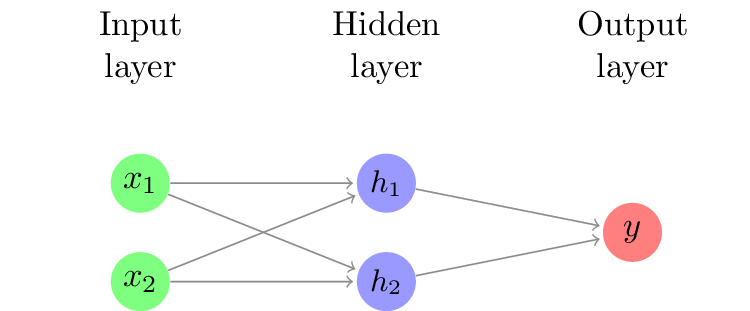

In [ ]:
name='firstnet'; os.system(f'latexmk -pdf {name}.tex; latexmk -c; convert -density 250 {name}.pdf -quality 100 {name}.png');Image(f'{name}.png')

- Consider the structure of what we just made
  - $y = f(x_1, x_2) = \sigma(-1 + 2 x_1 + 2 x_2) + \sigma(1 - 2 x_1 - 2 x_2)$
- Decompose the function into:
  - the *input layer* of $\hat{x}$,
  - the *hidden layer* which calculates $h_i = \beta_i \cdot x$ then passes if
    through the *activation function* $\sigma$, (called "sigmoid" in NN terms)
    - as in logistic, there is an extra $\beta_0$, called the
      *bias*, which controls how big the input into the node must be to activate
  - the *output layer* which sums the results of the hidden layer and gives $y$
    - $y = 0 + 1 \cdot \sigma(h_1) + 1 \cdot \sigma(h_2)$,
      $h_1 = 2 x_1 + 2 x_2 - 1$, $h_2 = - 2 x_1 - 2 x_2 + 1$
- The logistic function (when in a NN its called "sigmoid") is our "activation function"

# Feed-Forward Neural Network

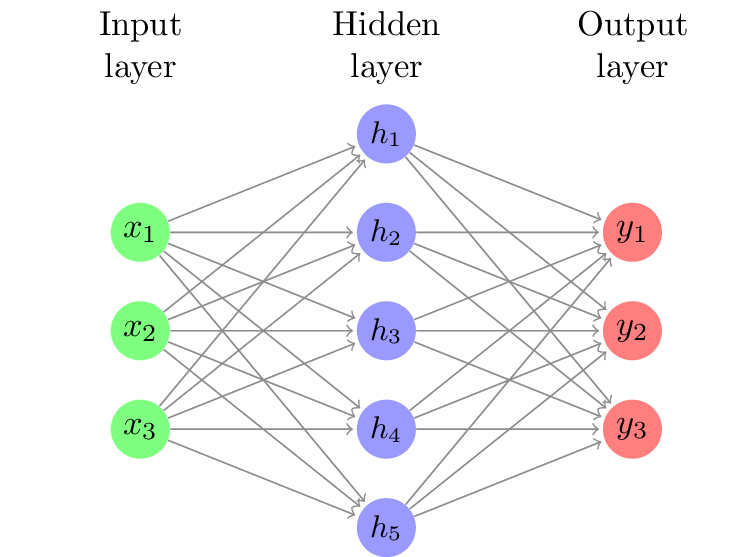

In [ ]:
name='secondnet'; os.system(f'latexmk -pdf {name}.tex; latexmk -c; convert -density 250 {name}.pdf -quality 100 {name}.png');Image(f'{name}.png')

- In general, we could have several input variables, and output variables
- In the case of classification, we would usually have a final
  *softmax* applied to $\hat{y}$, but could use any *activation* $\varphi$ here
  - We will talk about softmax next week

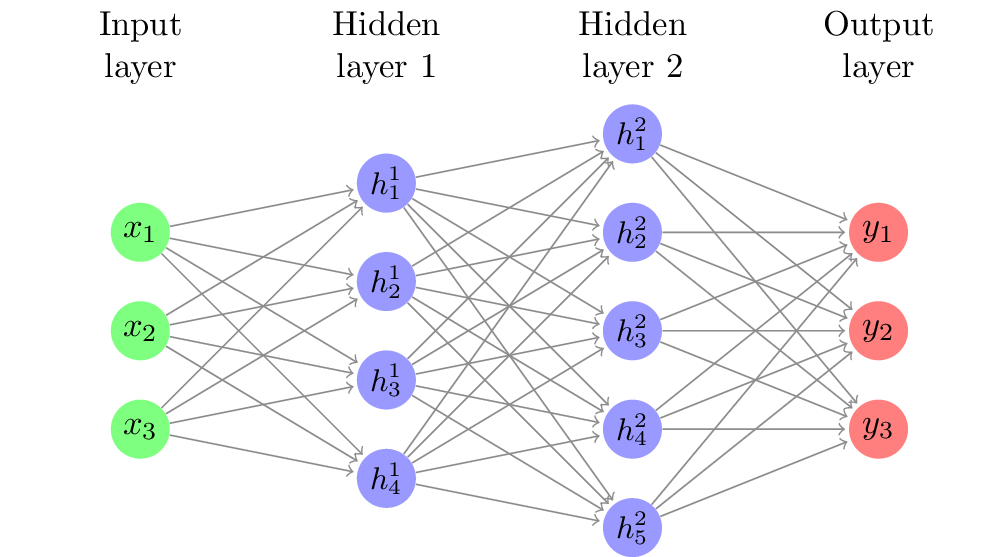

In [ ]:
name='thirdnet'; os.system(f'latexmk -pdf {name}.tex; latexmk -c; convert -density 250 {name}.pdf -quality 100 {name}.png');Image(f'{name}.png')

- We can even have several hidden layers
  - The previous layer acts the same as an *input layer* to the next
    layer
  - This structure facilitates *backpropagation* which is basically using the chain rule to speed up the computation of the derivatives. In pytorch, the automatic differentiation takes care of the details
- We call each node in the network a *neuron*
- When using for machine learning, we aim to train the weights, so
  that inputs get sent to the correct outputs after traversing the
  network

## Universal Approximation Thereom
by way of wikipedia...

Let $\varphi :\mathbb {R} \to \mathbb {R}$ be a nonconstant,
bounded, and continuous function. Let $I_{m}$ denote the
$m$-dimensional unit hypercube $[0,1]^{m}$. The space of
real-valued continuous functions on $I_{m}$ is denoted by
$C(I_{m})$. Then, given any $\varepsilon >0$ and any function
$f\in C(I_{m})$, there exist an integer $N$, real constants
$v_{i},b_{i}\in \mathbb {R}$ and real vectors $w_{i}\in \mathbb {R}
^{m}$ for $i=1,\ldots ,N$ such that we may define:

$$F(x)=\sum _{i=1}^{N}v_{i}\varphi \left(w_{i}^{T}x+b_{i}\right)$$

as an approximate realization of the function $f$; that is,
$$|F(x)-f(x)|<\varepsilon$$
for all $x\in I_{m}$. In other words, functions of the form $F(x)$ are dense in $C(I_{m})$.

This still holds when replacing $I_{m}$ with any compact subset of $\mathbb {R} ^{m}$. 


- In brief: with a hidden layer (of enough nodes), any (sensible)
  function $f : \mathbb{R}^m \to \mathbb{R}$ can be approximated by
  a feed-forward NN
  - Any (sensible) activation $\varphi$ can work, not just $\sigma$
- *A Neural Network is a universal function approximator*

## Neural Network in PyTorch (manually)
- A basic neural network in pytorch can easily be made by hand
  - I'm sure you can see how you could wrap this up into a function
  - One thing to notice here: we're initializing the weights with `randn`, which draws from the normal (Gaussian) distribution, the idea is to try to keep the values we pass through the network roughly in the range [-1,1], where the `tanh` and `sigmoid` functions have non-zero gradient. With gradients values of zero, the network can't learn.

In [ ]:
import torch
inputs = 2
nodes = 6
# we're building a 2 -> 6 -> 1 feed-forward neural network
x = torch.zeros((inputs,))
# A holds the weights, b holds the biases
A1 = torch.randn((nodes,inputs)) # 6 rows, 2 columns
b1 = torch.randn((nodes,)) # 6 biases
hidden = torch.tanh(torch.matmul(A1, x) + b1)
# nb. tanh(x) is like a sigmoid(x) outputting -1 to 1 instead of 0 to 1
A2 = torch.randn((1,nodes)) # 1 row, 6 columns
b2 = torch.randn((1,)) # 1 bias
y = torch.sigmoid(torch.matmul(A2, hidden) + b2)
print("", x, "\n", hidden, "\n", y)

 tensor([0., 0.]) 
 tensor([ 0.1830,  0.3996,  0.7971,  0.6965, -0.8535,  0.6659]) 
 tensor([0.2258])


## Neural Network in PyTorch (with nn)

- But typically, of course, its not done that way
- pytorch gives you helper functions to build out your neural nets,
  they live in the `torch.nn` package
- But remember, you could build these components yourself as in the
  last page, there's nothing magic happening beyond hiding the
  book-keeping
- We should create a new class for our network, which inherits from `nn.Module`
- In the `__init__` we should call the `super` class constructor and
  define any layers which hold our parameters
  - `nn.Linear(a,b)` defines a fully connected layer, as in our
    diagrams earlier, which expects `a` inputs and connects to `b`
    output nodes
  - Internally, this is setting up the network so that any pytorch `Parameter`s get associated to the object and can be sent to and from the GPU with `.cuda()` or `.to(torch.device("cuda"))`, etc.
- And should make a `forward` function which can process input data
- And thats it! pytorch can do the rest

### Neural Network Example - MyNet

- Here we create a very simple network, which does the same as the
  network we created manually a few pages ago
  - The weight initialization is implicit here, and is actually drawn from a normal distribution scaled by the inverse square root of the number of incoming nodes [see here for some discussion](https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79)
- Notice, we can use any torch functions in the forward pass

In [ ]:
  import torch.nn as nn

  class MyNet(nn.Module):
    def __init__(self):
      super(MyNet, self).__init__()
      self.fc1 = nn.Linear(2, 6) # fc = fully-connected
      self.fc2 = nn.Linear(6, 1) # make sure the sizes are right
    def forward(self, x):
      # This is a typical pattern in torch code, reusing the
      # name x for succesive layers
      x = torch.tanh(self.fc1(x))
      x = torch.sigmoid(self.fc2(x))
      return x

### Using MyNet

- We can create an instance of `MyNet` then use it like any regular
  torch function (you can see also it `requires_grad` automatically)
- You will get a different result each time you run this, as pytorch
  randomly assigns the intial value of the parameters by sampling a
  unit normal function (this, as with most thing in pytorch, is
  customizable)

In [ ]:
net = MyNet() # create a new instance
x = torch.zeros(2) # create one "datapoint"
net(x) # feed the data through the network


tensor([0.4809], grad_fn=<SigmoidBackward>)

- You can pass multiple inputs at once (process a minibatch)

In [ ]:
net(torch.randn(4,2)) # 4 length-2 "datapoints"


tensor([[0.5472],
        [0.5214],
        [0.4605],
        [0.4277]], grad_fn=<SigmoidBackward>)

### GPU

- You'll need to put networks onto the GPU to use them, as they
  contain parameters which must be together on the GPU to process data

In [ ]:
x = torch.zeros(2).cuda()
net(x) #oh no! the parameters are still on the CPU!

RuntimeError: ignored

In [ ]:
net = net.cuda() # thats better
x = torch.zeros(2).cuda()
net(x)

tensor([0.5547], device='cuda:0', grad_fn=<SigmoidBackward>)

### Loss function
The binary cross-entropy is often used for binary classification.

It comes from assuming the Bernoulli probability. 
Given data x, the model should return the probability for $y=1$ and $y=0$:

$P(y=1|x) = p$,

$P(y=0|x) = 1-p$

(y=0 is fixed since there's only two possible outcomes, we're assuming our model is returning $p$ based on its parameters $\theta$, we'll be trying to increase $p$ if the data is labelled $y=1$, or decrease $p$ if labelled $y=0$) which we can combine into a single expression:

$P(y|x) = p^y (1-p)^{(1-y)}$

We can take the log and rewrite as:

$\log P(y|x) = y \log p + (1-y) \log (1-p)$

Then, for several datapoints (identical, independently distributed, so the probabilities simply multiply):

$P(y_i|x_i) = \prod_{i} p_i^{y_i} (1-p_i)^{(1-y_i)}$

$\log P(y|x) = \sum_i \left[y_i \log p_i + (1-y_i) \log (1-p_i)\right]$

For any given example, we want to maximize the probability of the given category (that is, we are told $y_i$, so we want to maximize $\log p$ if $y=1$, or $\log(1-p)$ if $y=0$).

Because $\log$ is strictly increasing on [0,1], maximizing $P$ is equivalent to maximizing $\log P$.

Maximizing $\log P$ is equivalent to minimizing $-\log P$.

Hence, we want to find the best model in binary classification, we want to minimize the binary cross-entropy loss:

$$BCELoss = -\sum_i \left[ y_i \log p_i + (1-y_i) \log (1-p_i) \right]$$

The figure below shows the BCELoss for a single example given $y=0$ or
$y=1$. You can see from the graph that the further from the true value
the model output is, the larger the loss is, so the model will prefer
to fix examples far from the truth labels.

(The name comes from an alternative way to derive the same loss function, by considering the entropy between the true probability distribution, and the probability distribution given by the model)

Text(0, 0.5, 'y log p + (1-y) log (1-p)')

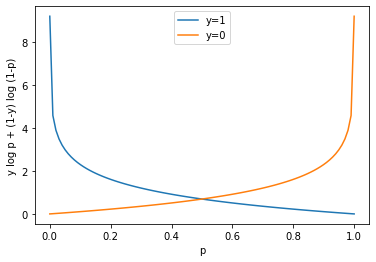

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
eps=1e-4
x=np.linspace(eps,1-eps,100)
plt.plot(x,-np.log(x),label='y=1')
plt.plot(x,-np.log(1-x),label='y=0')
plt.legend(); plt.xlabel("p"); plt.ylabel("y log p + (1-y) log (1-p)")

Reminder of loss functions in pytorch
- To train a network, we need a function to minimize, a *loss* function
- There are many loss functions built-in to pytorch, some useful ones:
  - `BCELoss` : binary cross-entropy loss, for classifying a single
    output for on-off/yes-no conditions, it returns **-log(output)** if
    the result should be 1, **-log(1-output)** if the result should be 0
    - This derives from a likelihood anaylsis of the binomial distribution
  - `CrossEntropyLoss` : cross-entropy loss, for classifying into
    multiple categories using a one-hot encoding scheme,
    **-log(output[correct position])**
  - `MSELoss` : mean-square error loss, useful for regression and
    similar
- They have the common form `loss_fn(prediction, true_values)`
  - `prediction` is the network output for a batch, `true_values` are
    the corresponding truth labels

In [ ]:
loss_fn = torch.nn.BCELoss() # the losses live in torch.nn
out = net(torch.zeros(2).cuda()) # the net is on the GPU
print(out)
print(torch.tensor([1.]))
loss = loss_fn(out, torch.tensor([1.]).cuda()) # one datapt
print(loss.item(), -torch.log(out).item()) # theres no magic

tensor([0.5249], device='cuda:0', grad_fn=<SigmoidBackward>)
tensor([1.])
0.6445386409759521 0.6445386409759521


## Optimizers

- There are also built in optimizers, that automate most of the
  book-keeping required, and implement more advanced SGD update strategies
  - Adagrad, Adam, RMSProp, etc.
  - These are mostly ways of choosing the $\lambda$ parameter we used
    last week, rather than keeping it fixed, as well as implementing
    *momentum*
- The idea is that you give them the parameters they should keep track of
  when you initialize them, then calculate a `loss.backward()`
  (accumulating many times if you like), then call the `step()` function to
  update the parameters
  - The nn.Module knows its own parameters, and returns them from
    `net.parameters()`
- They live in the `torch.optim`

### Momentum

[A nice page on momentum](https://distill.pub/2017/momentum/)

A simple extension of SGD is to add *momentum*. Instead of simply
following the gradient, we keep track of a momentum vector $v$, and
update the momentum with the current gradient. Basically, we are
following a (decaying) average direction of the previous updates.  The
idea is that the momentum will minimize fluctuations from the
stochastic gradient descent, and build toward a good direction for the
parameters to follow down the loss landscape. We weight the previous
momentum by a "dampening" term in the update, which we will call
$\gamma$, and is usually between 0.9 and 0.999.

To update the $t$'th step using the $t-1$ step (our loss function is
$L$, our parameters are $\theta$):

$$v_t = \gamma v_{t-1} + \nabla_\theta L(\theta)$$
$$\theta_t = \theta_{t-1} - \eta v_t$$

In pytorch, add `momentum` to the SGD parameter list to optimize with
momentum. (You can see if $\gamma=0$ we simply have SGD without momentum)


In [ ]:
import torch.optim as optim
# create a basic stochastic gradient descent optimizer with momentum
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

### Putting it together

- Lets review:
  - We can create a custom network by inheriting from `nn.Module`
    - Define your parameters in `__init__`
    - Write the forward pass in `forward`
  - We need to define a *loss function* which will be minimized in training
  - We define an *optimizer* which we give the parameters to optimize
  - Run over some labelled data, calculate the loss, accumulate the
    gradients, and then step the optimizer to update the network
  - Rinse and repeat until you're happy with the results

Update our `net` from one example using the `loss_fn` and `optimizer`
defined earlier, printing out an example parameter to show it updates
(remember I've put the network on the GPU)

In [ ]:
print(list(net.parameters())[-1].item())
out = net(torch.zeros(2).cuda())
loss = loss_fn(out, torch.tensor([1.]).cuda())
loss.backward()
optimizer.step()
print(list(net.parameters())[-1].item())

0.023122351616621017
0.02549782767891884


## Helpful Things to Know
- There are some niceties that pytoch gives you
- The optimizer can zero out the gradients of all the parameters with
  `zero_grad()`

In [ ]:
print(list(net.parameters())[-1].grad.item())
optimizer.zero_grad()
print(list(net.parameters())[-1].grad.item())

-0.47509533166885376
0.0


- You can run several datapoints at once and the loss function returns
  the average loss of the batch
  - Therefore, we don't have any issue of multiple returns when
    calculating the gradient, you just run a batch and call backward

In [ ]:


points = torch.zeros((5,2)).cuda() # 5 length 2 datapoints
loss = loss_fn(net(points), torch.ones(5,1).cuda())
loss.backward()
loss.item()

0.5892950296401978

## Complete setup and training example

Assume we have data in X with targets in Y. We run the optimization of
a 3->8->1 NN for 3 epochs with a minibatch size of 5.



In [ ]:
class ExampleNet(nn.Module):
  def __init__(self):
    super(ExampleNet, self).__init__()
    self.fc1 = nn.Linear(3, 8) # fc = fully-connected
    self.fc2 = nn.Linear(8, 1) # make sure the sizes are right
  def forward(self, x):
    x = torch.tanh(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    return x

nepochs, minibatch_size = 3, 5
net = ExampleNet()
loss_fn = torch.nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for _ in range(nepochs):
  for idx in range(0,len(X),minibatch_size):
    optimizer.zero_grad()
    prediction = net(X[idx:idx+minibatch_size])
    loss = loss_fn(prediction, Y[idx:idx+minibatch_size])
    loss.backward()
    optimizer.step()

RuntimeError: ignored

# Exercises <a id="exercises" />

- We've now seen enough to be able to train some basic pytorch networks
  in the standard way. Note in pytorch, unlike some other frameworks
  such as Keras, there's no built-in `fit` function which splits up the
  data into batches and automatically runs a training loop. You have to
  code it yourself (at least they haven't added this since the last time
  I looked, these frameworks tend to be fast moving).
- In the exercises we'll define some networks and train them up.
- In particular, we'll extend the track parameter regression task from last week into a Neural Network model
- We'll discuss training regimes further in future weeks
The example showed a feedforward neural network with one hidden layer.

Take the example `MyNet` and change it make a two hidden layer
feedforward neural network in pytorch, where each layer has 8 nodes.


In [ ]:
  import torch
  import torch.nn as nn

  class MyNet(nn.Module):
    def __init__(self):
      super(MyNet, self).__init__()
      self.fc1 = nn.Linear(2, 8) 
      self.fc2 = nn.Linear(8, 8) 
      self.fc3 = nn.Linear(8,2)
    def forward(self, x):
      # This is a typical pattern in torch code, reusing the
      # name x for succesive layers
      x = torch.tanh(self.fc1(x))
      x = torch.tanh(self.fc2(x))
      x = torch.sigmoid(self.fc3(x))
      return x

Lets create some fake data for a classification task. The data is two-dimensional and in two
categories, red=0 and blue=1 and we generate them based on some 2D
gaussian distributions with a bit of overlap.


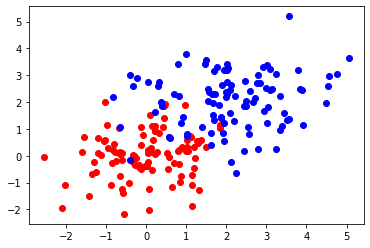

In [ ]:
import matplotlib.pyplot as plt
npoints = 100
red = torch.stack((torch.randn(npoints), torch.randn(npoints)), axis=1) 
blue = torch.stack((torch.randn(npoints)+2, torch.randn(npoints)+2), axis=1)
# print(red)

plt.scatter(red[:,0], red[:,1], c='r')
plt.scatter(blue[:,0], blue[:,1], c='b')


Make a simple one hidden layer neural network and train it to classify
the fake data into the two categories. Use binary cross-entropy loss
with a SGD optimizer with learning rate 0.005. Train for at least 5
epochs. Don't forget to zero out the gradients after you step the
optimizer (up to you to decide the minibatch scheduling).
(Nb. I haven't given you the y labels so you'll need to create them).
Keep track of the average of the loss function for each epoch and print it out each epoch (remembering that the loss will return the average for the minibatch).

In [ ]:
  import torch
  import torch.nn as nn
  import torch.optim as optim
  import matplotlib.pyplot as plt
  import numpy as np

npoints = 100
red = torch.stack((torch.randn(npoints), torch.randn(npoints)), axis=1)
blue = torch.stack((torch.randn(npoints)+2, torch.randn(npoints)+2), axis=1)

# X = red
# Y = blue

X = torch.vstack((red,blue))
Y = torch.cat((torch.zeros(red.shape[0]),torch.ones(blue.shape[0])))
Y = torch.reshape(Y, (200, 1))

  class MyNet(nn.Module):
    def __init__(self):
      super(MyNet, self).__init__()
      self.fc1 = nn.Linear(2, 8) 
      self.fc2 = nn.Linear(8, 8) 
      self.fc3 = nn.Linear(8, 1)
    def forward(self, x):
      x = torch.tanh(self.fc1(x))
      # print('1', x)
      x = torch.tanh(self.fc2(x))
      # print('2', x)
      x = torch.sigmoid(self.fc3(x))
      # print('3', x)
      return x


net = MyNet()
nepochs, minibatch_size = 45, 5

loss_fn = torch.nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.015)

list_loss = []

for i in range(nepochs):
    for idx in range(0,len(X),minibatch_size):
      optimizer.zero_grad()
      prediction = net(X[idx:idx+minibatch_size])
      label = Y[idx:idx+minibatch_size]
      loss = loss_fn(prediction, Y[idx:idx+minibatch_size])
      loss.backward()
      optimizer.step()
      list_loss.append(loss.detach().item())
    a = np.array(list_loss) 
    out = np.mean(a)
    print("the average of the loss function", i, out)

# loss_fn = torch.nn.BCELoss() # the losses live in torch.nn
# out = net(torch.zeros(2).cuda()) # the net is on the GPU
# loss = loss_fn(out, torch.tensor([1.]).cuda()) # one datapt
#print(loss.item(), -torch.log(out).item()) # theres no magic / -는 값이 로그스케일로하면 값이 음수라서 넣은거, item은 값 하나만 있으면 토치에 있는 값을 숫자로 가져온다.


the average of the loss function 0 0.7357531160116195
the average of the loss function 1 0.6992879524827004
the average of the loss function 2 0.6663679579893748
the average of the loss function 3 0.6353228474035859
the average of the loss function 4 0.6056415265798569
the average of the loss function 5 0.577324862157305
the average of the loss function 6 0.5505377982876131
the average of the loss function 7 0.5254512627609074
the average of the loss function 8 0.5021816551271412
the average of the loss function 9 0.4807726193219423
the average of the loss function 10 0.4611977267671715
the average of the loss function 11 0.44337501052456596
the average of the loss function 12 0.42718602195382116
the average of the loss function 13 0.41249362089272057
the average of the loss function 14 0.39915557521084943
the average of the loss function 15 0.3870335190091282
the average of the loss function 16 0.3759980594739318
the average of the loss function 17 0.3659311926458031
the average of th

What is the accuracy of the network? That is, what is the number of
datapoints the network classifies correctly, divided by the number of
datapoints the network classifies incorrectly. Take "correctly" to
mean that the network gives an output < 0.5 for red points, and > 0.5
for blue points.

In [ ]:
minibatch_size =1
corr = 0
print(len(X))
for idx in range(0,len(X), minibatch_size):
  output = net(X[idx:idx+minibatch_size])
#  print(output)
  if (output < 0.5 and Y[idx] == 0) or (output > 0.5 and Y[idx] == 1):
    corr += 1

acc = corr/len(X)
print(acc)

200
0.93


## Track fitting, part 2

Last week, we optimized the radius parameter of a known model in order
to find the pt of a particle which left a track in a detector. This
required us to know in which the direction the particle was fired, and
to have the expression for the helical propagation of the
particle. The radius would also need to be optimized for each particle
track.

This week, we will use a neural network to build a model whose output
is not only the $p_T$ of the track, but also the initial $\phi$ direction (angle from the x-axis in the transverse plane),
the pseudorapidity $\eta$, and the charge of the track.

The following cell will download a numpy file with 26,000 example
tracks of 10 hits each, with `(x,y,z)` info for each hit, stored as
`x`, as well as the corresponding `(pt, eta, phi, q)` information
stored in `y`. The goal is to build a neural network which takes 30
inputs (so, you'll need to reshape the input), and produces 4 outputs.

Nb. Pseudorapidity is typically used for proton-proton collider experiments as pseudorapidity differences are invariant under boosts along the z-axis for massless particles (and in pp collisions we know $p_t$ is initially 0, but we don't know the $p_z$ of the colliding partons, and the outgoing particles can be approximated as massless compared to their momentum). The expression for pseudorapidity from the angle from the z-axis $\theta$ is:
$$\eta=-\ln\tan(\theta/2)$$


In [5]:
import numpy as np
import requests, io
resp=requests.get('https://cernbox.cern.ch/index.php/s/mLHcI8t0xhzWcRt/download', stream=True)
hits=np.load(io.BytesIO(resp.content))
x = hits['x']
y = hits['y']
x.shape, y.shape

((26000, 10, 3), (26000, 4))

Here are example (x,y) and (r,z) plots for the first event. You can see its a particle with a significant clockwise bend (charge=1, lowish pt), travelling in the backward z direction (negative eta).

array([ 2.20911646, -0.45175734,  0.20189908,  1.        ])

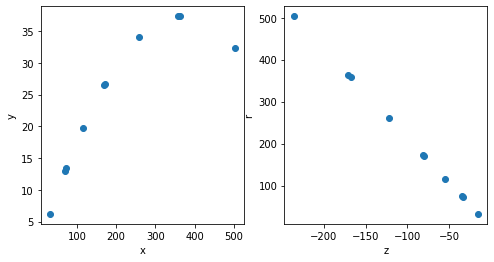

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(x[0,:,0], x[0,:,1])
plt.xlabel('x'), plt.ylabel('y')
plt.subplot(1,2,2)
plt.scatter(x[0,:,2], np.sqrt(x[0,:,0]**2 + x[0,:,1]**2))
plt.xlabel('z'), plt.ylabel('r')
y[0] # pt,eta,phi,q

Create and train a network to predict the `y` values based on the input.
Its best to keep the inputs and outputs between -1 and 1.
The ranges of the variables are:

- Inputs: `x` $\in [-1000,1000]$
- Outputs: `y[:,0]` is $p_T \in [1, 10]$ (units are GeV), `y[:,1]` is $\eta \in [-1,1]$, `y[:,2]` is $\phi \in [-\pi,\pi]$, `y[:,3]` is $q \in {-1,1}$

Use the first 25,000 particles for training, and the last 1,000 particles for testing. Report the train and test losses after each epoch. Run as many epochs as you think is necessary to have a well-trained network (it will require some playing with the hyperparameters).

In [20]:
import torch.nn as nn
import torch
import torch.optim as optim
import numpy as np

# model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(30, 10) # fc = fully-connected
        self.fc2 = nn.Linear(10, 4) # make sure the sizes are right
    def forward(self, x):
  # This is a typical pattern in torch code, reusing the
  # name x for succesive layers
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x

# data set
x_scale = x * 0.001
y_scale = y * 1

y_scale[:,0] = (2/9.32) * (y_scale[:,0]-0.67) - 1
y_scale[:,2] = y[:,2] / np.pi

x_train = torch.tensor(x_scale[:25000,:,:].reshape(25000,30))
y_train = torch.tensor(y_scale[:25000,:])
x_test = torch.tensor(x_scale[25000:,:,:].reshape(1000,30))
y_test = torch.tensor(y_scale[25000:,:])

tensor(0.3154, grad_fn=<DivBackward0>)
tensor(0.3132, grad_fn=<DivBackward0>)


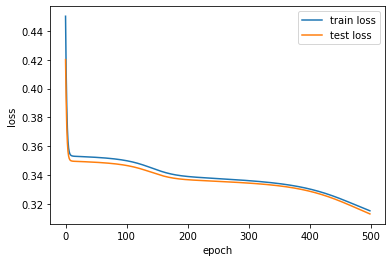

In [22]:
# preparation(loss function, optimizer, etc.)
nepochs, minibatch_size = 500, 100 # 100
net = Net()
loss_fn = torch.nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
tr_loss = []
te_loss = []

# train and test
for _ in range(nepochs):
  batch_loss = []
  for idx in range(0,len(x_train),minibatch_size):
    optimizer.zero_grad()
    prediction = net(x_train[idx:idx+minibatch_size].float())
    loss = loss_fn(prediction, y_train[idx:idx+minibatch_size].float())
    loss.backward()
    optimizer.step()
    batch_loss.append(loss)
  tr_loss.append(sum(batch_loss)/len(batch_loss))
  #print(f'The tr loss = {loss:.3} for epoch_{_+1}')
  batch_loss = []
  for idx in range(0,len(x_test),minibatch_size):
    prediction = net(x_test[idx:idx+minibatch_size,:].float())
    loss = loss_fn(prediction, y_test[idx:idx+minibatch_size].float())
    batch_loss.append(loss)
  te_loss.append(sum(batch_loss)/len(batch_loss))
  #print(f'The te loss = {loss:.3} for epoch_{_+1}')

print(tr_loss[-1])
print(te_loss[-1])

# plot
plt.plot(tr_loss, label='train loss')
plt.plot(te_loss, label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

Now, see how well the network is doing. Draw histograms of the difference between the model output and the true values (the *residual* distribution) for each of the variables. Which variables are well-modelled? Which variables are more difficult?

In [23]:
x_scale = x_scale.reshape(26000,30)
m_o = net(torch.tensor(x_scale).float())
y_scalea = torch.tensor(y_scale)

m_o_pt, m_o_eta, m_o_phi, m_o_q = m_o[:,0], m_o[:,1], m_o[:,2], m_o[:,3]
t_v_pt, t_v_eta, t_v_phi, t_v_q = y_scalea[:,0], y_scalea[:,1], y_scalea[:,2], y_scalea[:,3]

In [24]:
(m_o_pt[0]-t_v_pt[0]).item()

0.6045699342765521

<Figure size 432x288 with 0 Axes>

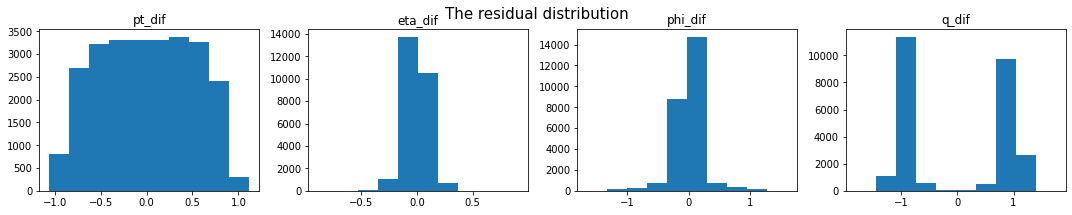

tensor([-0.0651,  0.0344, -0.0602,  ..., -0.1337, -0.3874, -0.2694],
       grad_fn=<SelectBackward>)
tensor([-0.6697,  0.3919,  0.3548,  ..., -0.3056, -0.6857,  0.4854],
       dtype=torch.float64)


In [25]:
pt_resi, eta_resi, phi_resi, q_resi = [], [], [], []
for i in range(26000):
    pt_resi.append((m_o_pt[i]-t_v_pt[i]).item())
    eta_resi.append((m_o_eta[i]-t_v_eta[i]).item())
    phi_resi.append((m_o_phi[i]-t_v_phi[i]).item())
    q_resi.append((m_o_q[i]-t_v_q[i]).item())

plt.figure()
fig, ax = plt.subplots(1,4, figsize=(15,3))

ax[0].hist(pt_resi, bins=10)
ax[1].hist(eta_resi, bins=10)
ax[2].hist(phi_resi, bins=10)
ax[3].hist(q_resi, bins=10)

ax[0].set_title("pt_dif")
ax[1].set_title("eta_dif")
ax[2].set_title("phi_dif")
ax[3].set_title("q_dif")

fig.tight_layout()
plt.suptitle('The residual distribution', size=15)
plt.show()

print(m_o_pt)
print(t_v_pt)

# "They have a peak around zero on the residual distribution, but pt looks worse than the others"